**Data Cleanning**

In [496]:
#Import all relevant libraries
import pandas as pd
import numpy as np

In [497]:
#read in data into pandas dataframe
data = pd.read_csv('all_schools_all_semesters_20191126.csv')
data.head()

,student_id,school,term,academicriskscore,engagementriskscore,financialriskscore,beliefriskscore,overallriskscore,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,...,engagement,financial,wellness,response_created,wheniwasinhighschool,ifihaveanissue,myparentsrelativessupportmefina,istruggletopayfortextbooks,year,returnedfall2019
0,1.0,1,fall 2019,0.0,0.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,1,fall 2018,2.0,12.0,4.0,0.0,18.0,Because it is close to work/home,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,1,spring 2019,2.0,12.0,4.0,0.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1,fall 2019,0.0,0.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,1,fall 2019,-1.0,5.0,1.0,NaN,7.0,It was the most affordable option,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [498]:
#Drop variables
variables_to_drop = ['academicriskscore', 'engagementriskscore', 'financialriskscore', 'beliefriskscore',
                     'overallriskscore', 'wellnessriskscore', 'id', 'ethnic_group_tr', 
                     'residency', 'citizenship', 'um_acad_prog1', 'um_acad_plan1', 'actcomposite', 
                     'hispanic', 'nonresalien', 'americanindian', 'asian', 'black', 'pacific', 'white',
                     'actionrsn', 'advisor', 'sport', 'eligterm', 'overallrisk', 'academic', 'engagement',
                     'financial', 'wellness', 'response_created', 'year', 'returnedfall2019', 'name', 'middle', 'f18_dropout', 
                     's19_dropout', 'returnedfall2019','pleasespecifyyourraceethnicity', 'withwhatgenderdoyouidentify', 'student_id']


data = data.drop(variables_to_drop, 1)

In [499]:
#Drop students with no survey responses
data = data.dropna(subset=['doyouliveoncampus'])
data.shape[0]

2838

In [500]:
#check if we have any duplicated instance
duplicateRowsDF = data[data.duplicated(['student_id', 'term', 'school'])]

assert(duplicateRowsDF.shape[0] == 0)

KeyError: Index(['student_id'], dtype='object')

In [501]:
#check how many dropouts we have and replace missing values with 0
data['dropout'] = data['dropout'].fillna(0)
data['dropout'].value_counts()

0.0    2658
1.0     180
Name: dropout, dtype: int64

In [502]:
#Check if we have dropouts for each school
data[['school', 'dropout']].groupby(['school']).agg(['mean', 'std', 'count'])

dropout                
            mean       std count
school                          
1       0.085583  0.279828  1741
2       0.006378  0.079655   784
3       0.083067  0.276426   313

In [503]:
#Check if we have dropouts for each term
data[['term', 'dropout']].groupby(['term']).agg(['mean', 'std', 'count'])

dropout                
                 mean       std count
term                                 
fall 2018    0.126645  0.332848   608
fall 2019    0.003041  0.055081  1644
spring 2019  0.167235  0.373505   586

In [504]:
#Create two columns for semseter and a year and drop original term variable and convert the semester to float
data[['Semester','Year']] = data.term.str.split(expand=True) 
data = data.drop('term',1)
data['Semester'] = (data['Semester'] == 'spring').astype(float)
data.head()

,school,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,doyouliveoncampus,doyouhaveanymajorfamilycommitmen,haveyoumetwithyouradvisororhavea,howlikelyareyoutorecommendyourun,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,...,whichofthefollowingbestdescribes,doyouhavechildren,areyouanathlete,dropout,wheniwasinhighschool,ifihaveanissue,myparentsrelativessupportmefina,istruggletopayfortextbooks,Semester,Year
1,1,Because it is close to work/home,No,No,No,Yes,10,Agree,Disagree,Disagree,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2018
2,1,NaN,NaN,No,No,Yes,10,Agree,Somewhat agree,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,2019
4,1,It was the most affordable option,No,Yes,No,Yes,.,Agree,Disagree,NaN,...,To get a better job or make more money,No,No,0.0,NaN,NaN,NaN,NaN,0.0,2019
5,1,Other,Yes,Yes,No,No,7,Somewhat Agree,Disagree,Disagree,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2018
6,1,NaN,NaN,Yes,No,Yes,6,Somewhat agree,Disagree,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2019


In [505]:
#Combine identical Questions
data.howlikelyareyoutorecommendyourun = np.where(data.howlikelyareyoutorecommendyourun == '.', np.NaN, data.howlikelyareyoutorecommendyourun)
data['howlikelyareyoutorecommendyourun'] = data['howlikelyareyoutorecommendyourun'].astype(float)
data.loc[data['howlikelyareyoutorecommendyoursc'] == 0, 'howlikelyareyoutorecommendyoursc'] = 1

data.howlikelyareyoutorecommendyoursc = np.where(data.howlikelyareyoutorecommendyoursc.isnull(), data.howlikelyareyoutorecommendyourun, data.howlikelyareyoutorecommendyoursc)
data = data.drop('howlikelyareyoutorecommendyourun',1)

data.iamscaredoffailingoneormoreofmyc = np.where(data.iamscaredoffailingoneormoreofmyc.isnull(), data.iamscaredoffailingmorethanoneofm, data.iamscaredoffailingoneormoreofmyc)
data = data.drop('iamscaredoffailingmorethanoneofm',1)

data.wheniwasinhighschoolialwaysknewi = np.where(data.wheniwasinhighschoolialwaysknewi.isnull(), data.wheniwasinhighschool, data.wheniwasinhighschoolialwaysknewi)
data =data.drop('wheniwasinhighschool', 1)
data.ifihaveanissueihavesomeonetoreac = np.where(data.ifihaveanissueihavesomeonetoreac.isnull(), data.ifihaveanissue, data.ifihaveanissueihavesomeonetoreac)
data = data.drop('ifihaveanissue',1)
data.myparentsrelativessupportmefinan = np.where(data.myparentsrelativessupportmefinan.isnull(), data.myparentsrelativessupportmefina ,data.myparentsrelativessupportmefinan)
data = data.drop('myparentsrelativessupportmefina',1)
data.istruggletopayfortextbooksrentut = np.where(data.istruggletopayfortextbooksrentut.isnull(),data.istruggletopayfortextbooks , data.istruggletopayfortextbooksrentut)
data = data.drop('istruggletopayfortextbooks',1)

In [506]:
#Create a list of lakert scale and one_hot variables
lakirt = ['iaminterestedinthecoursesthatiam', 'mycourseloadistoochallenging', 'iamscaredoffailingoneormoreofmyc',
          'thecoursesthatiamtakingwillhelpm', 'iamconfidentthatiwillgraduateint', 'myparentsrelativessupportmefinan',
          'istruggletopayfortextbooksrentut', 'iworryalotaboutpayingforschool', 'iwouldbenefitfromhelpmanagingmyf',
          'iamconsideringtakingabreakfromsc', 'ifeellikeifitintomyschool', 'ifihaveanissueihavesomeonetoreac',
          'ioftenattendeventsorganizedbyacl', 'partyinggetsinthewayofmedoingwel', 'wheniwasinhighschoolialwaysknewi',
          'ibelievethatacollegedegreeisvalu', 'iwasexcitedtoseemyfriendswhenica', 'mysociallifegetsinthewayofmedoin',
          'iexerciseatleasttwiceaweek', 'igetmorethan7hoursofsleeponmostn', 'ithinkthatiwillbesuccessfulatthi'
          ]

one_hot = ['whydidyouchoosethisschool', 'areyouthefirstpersoninyourfamily', 
           'doyouliveoncampus', 'doyouhaveanymajorfamilycommitmen', 'haveyoumetwithyouradvisororhavea', 
            'didyoufailoneormoreofyourcourses', 'willyoubeworking20hoursaweekormo', 
           'whichofthefollowingbestdescribes', 'doyouhavechildren', 'areyouanathlete', 'iampayingforcollegeoutofpocketbu'    
          ] 

In [507]:
#combine similar response
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'It has a good academic reputation', 'Because of its academic reputation', data['whydidyouchoosethisschool'])
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'It is close to work/home', 'Because it is close to work/home', data['whydidyouchoosethisschool'])
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'Because the schoolâs classes fit with my work schedule', 'It offers classes that fit my work schedule', data['whydidyouchoosethisschool'])

In [508]:
#Create a flag for missing lakirt variables
for i in lakirt:
    if True in data[i].isnull().values:
        data[i+'_mv'] = (data[i].isnull()).astype(int) 

data.head()

,school,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,doyouliveoncampus,doyouhaveanymajorfamilycommitmen,haveyoumetwithyouradvisororhavea,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,...,Year,iwouldbenefitfromhelpmanagingmyf_mv,ioftenattendeventsorganizedbyacl_mv,partyinggetsinthewayofmedoingwel_mv,wheniwasinhighschoolialwaysknewi_mv,iwasexcitedtoseemyfriendswhenica_mv,mysociallifegetsinthewayofmedoin_mv,iexerciseatleasttwiceaweek_mv,igetmorethan7hoursofsleeponmostn_mv,ithinkthatiwillbesuccessfulatthi_mv
1,1,Because it is close to work/home,No,No,No,Yes,Agree,Disagree,Disagree,Agree,...,2018,0,0,0,0,1,1,1,1,1
2,1,NaN,NaN,No,No,Yes,Agree,Somewhat agree,Strongly disagree,Agree,...,2019,0,0,1,1,0,0,1,1,1
4,1,It was the most affordable option,No,Yes,No,Yes,Agree,Disagree,Strongly agree,Strongly agree,...,2019,1,1,1,0,1,1,0,0,0
5,1,Other,Yes,Yes,No,No,Somewhat Agree,Disagree,Disagree,Somewhat Agree,...,2018,0,0,0,0,1,1,1,1,1
6,1,NaN,NaN,Yes,No,Yes,Somewhat agree,Disagree,Agree,Somewhat agree,...,2019,0,0,1,1,0,0,1,1,1


In [509]:
for column in lakirt:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [510]:
#capitalize lakirt variables to treat Strongly disagree and Strongly Disagree as same
data[lakirt] = data[lakirt].applymap(lambda x : x.capitalize())
data[lakirt]

,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,iworryalotaboutpayingforschool,iwouldbenefitfromhelpmanagingmyf,iamconsideringtakingabreakfromsc,...,ifihaveanissueihavesomeonetoreac,ioftenattendeventsorganizedbyacl,partyinggetsinthewayofmedoingwel,wheniwasinhighschoolialwaysknewi,ibelievethatacollegedegreeisvalu,iwasexcitedtoseemyfriendswhenica,mysociallifegetsinthewayofmedoin,iexerciseatleasttwiceaweek,igetmorethan7hoursofsleeponmostn,ithinkthatiwillbesuccessfulatthi
1,Agree,Disagree,Disagree,Agree,Strongly agree,Agree,Disagree,Disagree,Agree,Disagree,...,Agree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree
2,Agree,Somewhat agree,Strongly disagree,Agree,Strongly agree,Agree,Disagree,Disagree,Somewhat agree,Disagree,...,Somewhat agree,Somewhat agree,Strongly disagree,Strongly agree,Agree,Somewhat agree,Disagree,Strongly agree,Agree,Agree
4,Agree,Disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Disagree,Agree,Agree,Disagree,...,Strongly disagree,Disagree,Strongly disagree,Somewhat agree,Agree,Agree,Disagree,Somewhat agree,Somewhat agree,Strongly agree
5,Somewhat agree,Disagree,Disagree,Somewhat agree,Strongly agree,Strongly disagree,Agree,Strongly agree,Strongly agree,Disagree,...,Disagree,Agree,Somewhat agree,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree
6,Somewhat agree,Disagree,Agree,Somewhat agree,Strongly agree,Strongly disagree,Agree,Strongly agree,Strongly agree,Disagree,...,Agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree
8,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Somewhat agree,Disagree,...,Strongly agree,Agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Agree,Agree
10,Strongly agree,Somewhat agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Agree,Strongly disagree,...,Somewhat agree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree
11,Somewhat agree,Somewhat agree,Strongly agree,Agree,Strongly agree,Somewhat agree,Agree,Agree,Agree,Disagree,...,Agree,Disagree,Strongly disagree,Somewhat agree,Agree,Agree,Disagree,Strongly disagree,Disagree,Strongly agree
15,Agree,Disagree,Disagree,Strongly agree,Strongly agree,Strongly agree,Disagree,Disagree,Agree,Disagree,...,Agree,Disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Somewhat agree,Agree
16,Agree,Disagree,Somewhat agree,Agree,Agree,Agree,Disagree,Strongly agree,Agree,Somewhat agree,...,Disagree,Disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Disagree,Agree,Disagree,Agree


In [511]:
if True in data['balancingworkandschoolistoostres'].isnull().values:
    data['balancingworkandschoolistoostres'+'_mv'] = (data['balancingworkandschoolistoostres'].isnull()).astype(int)

In [512]:
#seperately encode balncing work and schoo is stressful variable and generate work variable based on responses
data['balancingworkandschoolistoostres'].fillna(data['balancingworkandschoolistoostres'].mode()[0], inplace=True)
data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].map(lambda x : x.capitalize())

In [513]:
if 'Not applicable (i donât work)' in data['balancingworkandschoolistoostres'].values:
    data['not_work'] = (data['balancingworkandschoolistoostres'] == 'Not applicable (i donât work)').astype(int) 

In [514]:
data['work'] = (data['balancingworkandschoolistoostres'+'_mv'] == 0) & (data['not_work'] == 0)

In [515]:
data['work'] = data['work'].astype(int)

In [516]:
data['work'].value_counts()

0    1749
1    1089
Name: work, dtype: int64

In [517]:
data['balancingworkandschoolistoostres'].value_counts()

Disagree                           1948
Somewhat agree                      396
Agree                               214
Not applicable (i donât work)     105
Strongly agree                      103
Strongly disagree                    72
Name: balancingworkandschoolistoostres, dtype: int64

In [518]:
for i in data[data['dropout']==1].columns:
    print(i, data[data['dropout']==1][i].value_counts())

school 1    149
3     26
2      5
Name: school, dtype: int64
whydidyouchoosethisschool Because it is close to work/home               46
Other                                          41
Because of its academic reputation             18
It offers classes that fit my work schedule     3
Name: whydidyouchoosethisschool, dtype: int64
areyouthefirstpersoninyourfamily No     79
Yes    29
Name: areyouthefirstpersoninyourfamily, dtype: int64
doyouliveoncampus Yes    108
No      72
Name: doyouliveoncampus, dtype: int64
doyouhaveanymajorfamilycommitmen No     162
Yes     18
Name: doyouhaveanymajorfamilycommitmen, dtype: int64
haveyoumetwithyouradvisororhavea Yes    110
No      70
Name: haveyoumetwithyouradvisororhavea, dtype: int64
iaminterestedinthecoursesthatiam Agree                87
Somewhat agree       57
Strongly agree       28
Disagree              5
Strongly disagree     3
Name: iaminterestedinthecoursesthatiam, dtype: int64
mycourseloadistoochallenging Disagree             97
Somewhat

In [519]:
ord_map = {'Strongly disagree': 1, 'Disagree': 2, 
               'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7, 'Not applicable (i donât work)': 4}

data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].map(ord_map)

In [520]:
#encode lakirt variables
gen_ord_map = {'Strongly disagree': 1, 'Disagree': 2, 
               'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7}
for i in data[lakirt]:
    data[i] = data[i].map(gen_ord_map)

In [521]:
#fill missing on_hot variables
data[one_hot] = data[one_hot].fillna('missing')

In [522]:
#data[one_hot] = data[one_hot].astype('category')
data = pd.get_dummies(data, columns = one_hot)

In [523]:
data.head()

,school,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,iworryalotaboutpayingforschool,iwouldbenefitfromhelpmanagingmyf,...,doyouhavechildren_No,doyouhavechildren_Yes,doyouhavechildren_missing,areyouanathlete_No,areyouanathlete_Yes,areyouanathlete_missing,iampayingforcollegeoutofpocketbu_Agree,iampayingforcollegeoutofpocketbu_Disagree,iampayingforcollegeoutofpocketbu_Not applicable (I already have loans),iampayingforcollegeoutofpocketbu_missing
1,1,6,2,2,6,7,6,2,2,6,...,0,0,1,0,0,1,0,0,0,1
2,1,6,5,1,6,7,6,2,2,5,...,0,0,1,0,0,1,0,1,0,0
4,1,6,2,7,7,7,5,2,6,6,...,1,0,0,1,0,0,0,0,0,1
5,1,5,2,2,5,7,1,6,7,7,...,0,0,1,0,0,1,0,0,0,1
6,1,5,2,6,5,7,1,6,7,7,...,0,0,1,0,0,1,0,0,1,0


In [524]:
data_columns = list(data)

In [525]:
data_columns

['school',
 'iaminterestedinthecoursesthatiam',
 'mycourseloadistoochallenging',
 'iamscaredoffailingoneormoreofmyc',
 'thecoursesthatiamtakingwillhelpm',
 'iamconfidentthatiwillgraduateint',
 'myparentsrelativessupportmefinan',
 'istruggletopayfortextbooksrentut',
 'iworryalotaboutpayingforschool',
 'iwouldbenefitfromhelpmanagingmyf',
 'balancingworkandschoolistoostres',
 'iamconsideringtakingabreakfromsc',
 'ifeellikeifitintomyschool',
 'ifihaveanissueihavesomeonetoreac',
 'ioftenattendeventsorganizedbyacl',
 'partyinggetsinthewayofmedoingwel',
 'wheniwasinhighschoolialwaysknewi',
 'ibelievethatacollegedegreeisvalu',
 'iwasexcitedtoseemyfriendswhenica',
 'mysociallifegetsinthewayofmedoin',
 'iexerciseatleasttwiceaweek',
 'igetmorethan7hoursofsleeponmostn',
 'ithinkthatiwillbesuccessfulatthi',
 'howlikelyareyoutorecommendyoursc',
 'dropout',
 'Semester',
 'Year',
 'iwouldbenefitfromhelpmanagingmyf_mv',
 'ioftenattendeventsorganizedbyacl_mv',
 'partyinggetsinthewayofmedoingwel_mv',
 'w

In [526]:
#check that we have no missing values
True in data.isna().values

False

In [527]:
data.to_csv('Data_Clean_Mode.csv',sep=',', index = None)

**Exploratory Analysis**

In [528]:
data.columns[2:12].tolist()

['mycourseloadistoochallenging',
 'iamscaredoffailingoneormoreofmyc',
 'thecoursesthatiamtakingwillhelpm',
 'iamconfidentthatiwillgraduateint',
 'myparentsrelativessupportmefinan',
 'istruggletopayfortextbooksrentut',
 'iworryalotaboutpayingforschool',
 'iwouldbenefitfromhelpmanagingmyf',
 'balancingworkandschoolistoostres',
 'iamconsideringtakingabreakfromsc']

In [36]:
columns_1 = data.columns[2:8].tolist()

In [37]:
columns_1.append('dropout')

In [38]:
columns_1

['iaminterestedinthecoursesthatiam',
 'mycourseloadistoochallenging',
 'iamscaredoffailingoneormoreofmyc',
 'thecoursesthatiamtakingwillhelpm',
 'iamconfidentthatiwillgraduateint',
 'myparentsrelativessupportmefinan',
 'dropout']

In [39]:
import seaborn as sns
sns.pairplot(data[columns_1]) #hue='dropout'

In [40]:
data.dropout.describe()

count    2838.000000
mean        0.063425
std         0.243769
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: dropout, dtype: float64

In [41]:
# columns_drop = []
# for i,j in enumerate(data.columns):
#     if 'withwhatgender' in data.columns[i]:
#         columns_drop.append(j)

In [95]:
columns_drop

NameError: name 'columns_drop' is not defined

In [ ]:
data.describe().transpose()

In [ ]:
data[['didyoufailoneormoreofyourcourses_Yes', 'dropout']].groupby(['didyoufailoneormoreofyourcourses_Yes']).agg(['mean', 'std', 'count'])

In [ ]:
data[['iamconsideringtakingabreakfromsc', 'dropout']].groupby(['iamconsideringtakingabreakfromsc']).agg(['mean', 'std', 'count'])

In [ ]:
data[['mysociallifegetsinthewayofmedoin', 'dropout']].groupby(['mysociallifegetsinthewayofmedoin']).agg(['mean', 'std', 'count'])

In [ ]:
data[['areyouthefirstpersoninyourfamily_Yes', 'dropout']].groupby(['areyouthefirstpersoninyourfamily_Yes']).agg(['mean', 'std', 'count'])

In [ ]:
data.corr()

In [ ]:
import pandas_profiling

In [ ]:
pandas_profiling.ProfileReport(data)

In [529]:
import sys
from matplotlib import pyplot as plt
import sklearn.metrics as skm
def plotCorr(dat, lab, h, w):
    '''
    Do a heatmap to visualize the correlation matrix, dropping the label
    '''

#     dat = dat.drop(lab, 1)
    #Get correlation and 0 out the diagonal (for plotting purposes)
    c_dat = dat.corr()
    for i in range(c_dat.shape[0]):
        c_dat.iloc[i,i] = 0

    c_mat = c_dat.as_matrix()
    #c_mat = c_mat[:-1, :-1]
    fig, ax = plt.subplots()
    heatmap = plt.pcolor(c_mat, cmap = plt.cm.RdBu)
 
    #Set the tick labels and center them
    ax.set_xticks(np.arange(c_dat.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(c_dat.shape[1]) + 0.5, minor = False)
    ax.set_xticklabels(c_dat.index.values, minor = False, rotation = 45)
    ax.set_yticklabels(c_dat.index.values, minor = False)
    heatmap.axes.set_ylim(0, len(c_dat.index))  
    heatmap.axes.set_xlim(0, len(c_dat.index)) 
    plt.colorbar(heatmap, ax = ax)

    #plt.figure(figsize = (h, w))
    fig = plt.gcf()
    fig.set_size_inches(h, w)

In [ ]:
lab = 'dropout'
X = data.drop(lab, 1)
Y = data[[lab]].values
cols = X.columns.values
mis = []

    #Start by getting MI
for c in cols:
    mis.append(skm.normalized_mutual_info_score(Y.ravel(), X[[c]].values.ravel()))

    #Get signs by correlation
corrs = data.corr()[lab]
corrs[corrs.index != lab]
df = pd.DataFrame(zip(mis, cols), columns = ['MI', 'Lab'])
df = pd.merge(df, pd.DataFrame(corrs), how = 'inner', left_on = 'Lab', right_index=True)
df_s = df.sort_values(by = ['MI'], ascending = False)
df_c = df.sort_values(by = ['dropout'], ascending = False)

In [ ]:
df_s

In [ ]:
df_c[5:15]

In [ ]:
largest = data.corr()['dropout'].nlargest(5).index
smallest = data.corr()['dropout'].nsmallest(5).index

In [ ]:
interesting = largest.append(smallest).tolist()

In [ ]:
interesting

In [ ]:
data.head()

In [ ]:
data.apply

In [ ]:
for i in data[data['dropout']==1].columns:
    print(i, data[data['dropout']==1][i].value_counts())

In [ ]:
data[data['dropout']==1].apply(value_counts(),axis=1)
                               

In [ ]:
data.groupby("dropout").mean()

In [ ]:
%matplotlib inline
import importlib
plotCorr(data[interesting], 'dropout', 10, 10)

In [327]:
# regular test, train, split (comment out everything underneath up to LR, Bernouilli, SVC, RF)
from sklearn.model_selection import train_test_split
X=data.drop("dropout",axis=1)
Y= data["dropout"]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, train_size=0.8)

In [461]:
# build training, testing set
id_rand =np.random.permutation(data.shape[0])
train_id = id_rand[:int(data.shape[0]*0.8)]
test_id=id_rand[int(data.shape[0]*0.8):]
train_df,test_df = data.iloc[train_id,:], data.iloc[test_id,:]

In [462]:
#  sampling prep
count_class_0, count_class_1 = train_df.dropout.value_counts()
df_class_0 = train_df[train_df['dropout'] == 0]
df_class_1 = train_df[train_df['dropout'] == 1]

In [463]:
# oversampling (comment out undersampling)
df_class_1_over = df_class_1.sample(n=count_class_0, replace=True)
df_train = pd.concat([df_class_0, df_class_1_over], axis=0)

In [384]:
# undersampling (comment out oversampling)
df_class_0_under = df_class_0.sample(n=count_class_1)
df_train = pd.concat([df_class_0_under, df_class_1], axis=0)

In [469]:
# train,test,split
X_train = df_train.drop("dropout",axis=1)
Y_train=df_train['dropout']
X_test=test_df.drop("dropout",axis=1)
Y_test=test_df['dropout']
np.sum(Y_test.values)

42.0

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                    Predicted Non Dropout  Predicted Dropout
Actual Non Dropout                    443                 83
Actual Dropout                          6                 36 LR Recall 0.8571428571428571
                    Predicted Non Dropout  Predicted Dropout
Actual Non Dropout                    368                158
Actual Dropout                          7                 35 NB Recall 0.8333333333333334


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


                    Predicted Non Dropout  Predicted Dropout
Actual Non Dropout                    521                  5
Actual Dropout                         42                  0 SVM Recall 0.0
                    Predicted Non Dropout  Predicted Dropout
Actual Non Dropout                    517                  9
Actual Dropout                         35                  7 RF Recall 0.16666666666666666


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


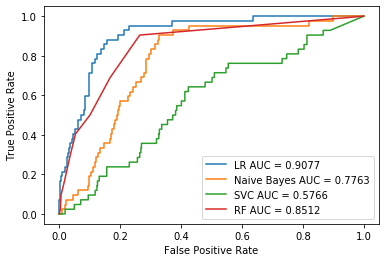

In [530]:
# LR, NB, SVC, RF
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,Y_train)
y_pred=lr_classifier.predict(X_test)
mat_lr=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Non Dropout", "Actual Dropout"],columns=["Predicted Non Dropout", "Predicted Dropout"])
lr_pred_proba=lr_classifier.predict_proba(X_test)
lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(Y_test, lr_pred_proba[:,1])
lr_auc = metrics.auc(lr_fpr, lr_tpr)
plt.plot(lr_fpr, lr_tpr, label = 'LR AUC = %0.4f' %lr_auc)
print(mat_lr,"LR Recall",recall_score(Y_test, y_pred, average='binary'))


from sklearn.naive_bayes import MultinomialNB
b_classifier = MultinomialNB()
b_classifier.fit(X_train,Y_train)
y_pred=b_classifier.predict(X_test)
mat_b=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Non Dropout", "Actual Dropout"],columns=["Predicted Non Dropout", "Predicted Dropout"])
b_pred_proba=b_classifier.predict_proba(X_test)
b_fpr, b_tpr, b_threshold = metrics.roc_curve(Y_test, b_pred_proba[:,1])
b_auc = metrics.auc(b_fpr, b_tpr)
plt.plot(b_fpr, b_tpr, label = 'Naive Bayes AUC = %0.4f' %b_auc)
print(mat_b,"NB Recall",recall_score(Y_test, y_pred, average='binary'))

from sklearn.svm import SVC
svc_classifier = SVC(probability=True)
svc_classifier.fit(X_train,Y_train)
y_pred=svc_classifier.predict(X_test)
mat_svc=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Non Dropout", "Actual Dropout"],columns=["Predicted Non Dropout", "Predicted Dropout"])
svc_pred_proba=svc_classifier.predict_proba(X_test)
svc_fpr, svc_tpr, svc_threshold = metrics.roc_curve(Y_test, svc_pred_proba[:,1])
svc_auc = metrics.auc(svc_fpr, svc_tpr)
plt.plot(svc_fpr, svc_tpr, label = 'SVC AUC = %0.4f' %svc_auc)
print(mat_svc,"SVM Recall",recall_score(Y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
mat_rf=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Non Dropout", "Actual Dropout"],columns=["Predicted Non Dropout", "Predicted Dropout"])
clf_pred_proba=clf.predict_proba(X_test)
clf_fpr, clf_tpr, clf_threshold = metrics.roc_curve(Y_test, clf_pred_proba[:,1])
clf_auc = metrics.auc(clf_fpr, clf_tpr)
plt.plot(clf_fpr, clf_tpr, label = 'RF AUC = %0.4f' %clf_auc)
print(mat_rf,"RF Recall",recall_score(Y_test, y_pred))


plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [531]:
# Random Forest: shuffle, cross validation, undersampling

from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


def xValRF(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    recall = []
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(n=count_class_1)
        df_train = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train.drop("dropout",axis=1)
        Y_train= df_train['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        clf = RandomForestClassifier()
        clf.fit(X_train,Y_train)
        y_pred=clf.predict(X_test)
        mat_rf=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
        clf_pred_proba=clf.predict_proba(X_test)
        clf_fpr, clf_tpr, clf_threshold = metrics.roc_curve(Y_test, clf_pred_proba[:,1])
        clf_auc = metrics.auc(clf_fpr, clf_tpr)
        plt.plot(clf_fpr, clf_tpr, label = 'RF AUC = %0.4f' %clf_auc)
        aucs.append(clf_auc)
        print(mat_rf)
        recall.append(recall_score(Y_test, y_pred, average='binary'))
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs,recall

In [532]:
# Support Vector Machine: shuffle, cross validation, undersampling

from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold


def xValSVC(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    recall=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(n=count_class_1)
        df_train = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train.drop("dropout",axis=1)
        Y_train= df_train['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        svc_classifier = SVC(probability=True)
        svc_classifier.fit(X_train,Y_train)
        y_pred=svc_classifier.predict(X_test)
        mat_svc=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
        svc_pred_proba=svc_classifier.predict_proba(X_test)
        svc_fpr, svc_tpr, svc_threshold = metrics.roc_curve(Y_test, svc_pred_proba[:,1])
        svc_auc = metrics.auc(svc_fpr, svc_tpr)
        plt.plot(svc_fpr, svc_tpr, label = 'SVC AUC = %0.4f' %svc_auc)
        aucs.append(svc_auc)
        print(mat_lr)
        recall.append(recall_score(Y_test, y_pred, average='binary'))        
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs,recall

In [533]:
# Naive Bayes: shuffle, cross validation, undersampling
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold


def xValB(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    recall=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(n=count_class_1)
        df_train = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train.drop("dropout",axis=1)
        Y_train= df_train['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        b_classifier = MultinomialNB()
        b_classifier.fit(X_train,Y_train)
        y_pred=b_classifier.predict(X_test)
        mat_b=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
        b_pred_proba=b_classifier.predict_proba(X_test)
        b_fpr, b_tpr, b_threshold = metrics.roc_curve(Y_test, b_pred_proba[:,1])
        b_auc = metrics.auc(b_fpr, b_tpr)
        plt.plot(b_fpr, b_tpr, label = 'Naive Bayes AUC = %0.4f' %b_auc)
        aucs.append(b_auc)
        print(mat_b)
        recall.append(recall_score(Y_test, y_pred, average='binary'))
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs,recall

In [534]:
# Logistic regression: shuffle, cross validation, undersampling
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold


def xValLR(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    recall=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(n=count_class_1)
        df_train = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train.drop("dropout",axis=1)
        Y_train= df_train['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        lr_classifier = LogisticRegression()
        lr_classifier.fit(X_train,Y_train)
        y_pred=lr_classifier.predict(X_test)
        mat_lr=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
        lr_pred_proba=lr_classifier.predict_proba(X_test)
        lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(Y_test, lr_pred_proba[:,1])
        lr_auc = metrics.auc(lr_fpr, lr_tpr)
        plt.plot(lr_fpr, lr_tpr, label = 'LR AUC = %0.4f' %lr_auc)
        aucs.append(lr_auc)
        print(mat_lr)
        recall.append(recall_score(Y_test, y_pred, average='binary')) 
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs,recall

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/camil

                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    405                    128
Actual Non Dropout                  6                     29
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    370                    159
Actual Non Dropout                  8                     31
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    390                    142
Actual Non Dropout                  4                     32
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    409                    131
Actual Non Dropout                  5                     22
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    382                    142
Actual Non Dropout                 12                     31


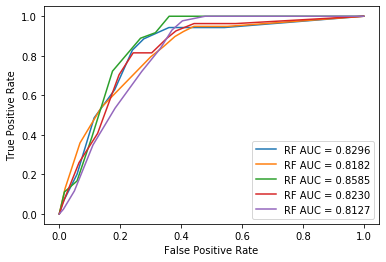

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


                    Predicted Non Dropout  Predicted Dropout
Actual Non Dropout                    443                 83
Actual Dropout                          6                 36
                    Predicted Non Dropout  Predicted Dropout
Actual Non Dropout                    443                 83
Actual Dropout                          6                 36
                    Predicted Non Dropout  Predicted Dropout
Actual Non Dropout                    443                 83
Actual Dropout                          6                 36


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


                    Predicted Non Dropout  Predicted Dropout
Actual Non Dropout                    443                 83
Actual Dropout                          6                 36
                    Predicted Non Dropout  Predicted Dropout
Actual Non Dropout                    443                 83
Actual Dropout                          6                 36


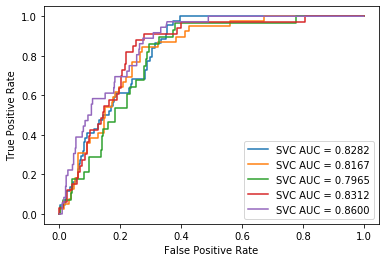

                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    335                    198
Actual Non Dropout                  1                     34
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    333                    203
Actual Non Dropout                  0                     32
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    327                    205
Actual Non Dropout                  2                     34
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    323                    202
Actual Non Dropout                  1                     41
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    322                    210
Actual Non Dropout                  1                     34


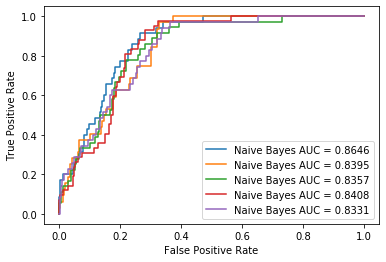

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    388                    147
Actual Non Dropout                  3                     30
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    382                    148
Actual Non Dropout                 10                     28
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    404                    132
Actual Non Dropout                  6                     26
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    395                    116
Actual Non Dropout                 20                     36
                    Predicted Dropout  Predicted Non Dropout
Actual Dropout                    381                    165
Actual Non Dropout                  2                     19


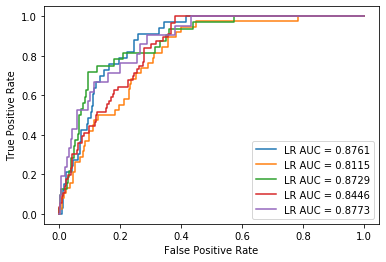

In [535]:
# Run each classification with cross validation
aucs_rf=xValRF(data, 5)
aucs_svc=xValSVC(data,5)
aucs_b=xValB(data,5)
aucs_lr=xValLR(data, 5)

In [536]:
# Mean of each classifier for each fold of cross validation
print(np.mean(aucs_rf[0]),np.mean(aucs_svc[0]),np.mean(aucs_b[0]),np.mean(aucs_lr[0]))
print(np.mean(aucs_rf[1]),np.mean(aucs_svc[1]),np.mean(aucs_b[1]),np.mean(aucs_lr[1]))
print(np.std(aucs_rf[0]),np.std(aucs_svc[0]),np.std(aucs_b[0]),np.std(aucs_lr[0]))
print(np.std(aucs_rf[1]),np.std(aucs_svc[1]),np.std(aucs_b[1]),np.std(aucs_lr[0]))

0.8284073465602247 0.8265261161517063 0.8427551377401115 0.8564752782781696
0.8096154319410133 0.9166389166389166 0.9726984126984128 0.8012104123946229
0.016043706530528352 0.020707353394401332 0.011282800012764306 0.025491451221204976
0.05431957987797087 0.0371644674826494 0.017658328870061444 0.025491451221204976


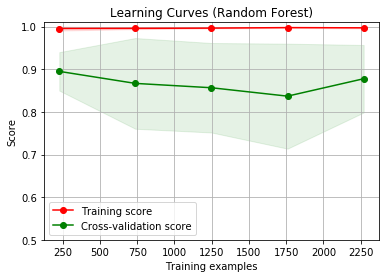

In [377]:
# Learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = data.drop("dropout",axis=1),data["dropout"]
title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, data.drop("dropout",axis=1),data["dropout"], ylim=(0.5, 1.01), cv=5, n_jobs=4)


plt.show()